### **Time Series - Moving Average (MA) Implementations on Google Stock**

**Objective:** forecast Google stock for the last two weeks of Dec 2021, by using historical data of the whole year of 2021

**Data was taken from:** [link text](https://finance.yahoo.com/quote/GOOG/history/)

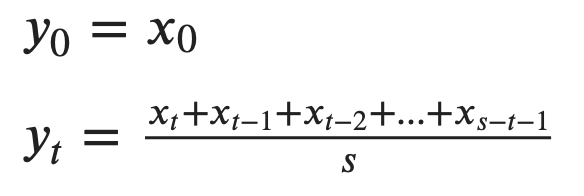

Above is a simple example of the Moving Average formula. Where 't' is the time period and 's' is the size of a sliding window.

In [ ]:
# loading labraries
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (12, 6))
sns.set(rc={'figure.figsize':(11.7,7.27)})
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

from statsmodels.tsa.seasonal import seasonal_decompose
from cycler import cycler

from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller

<Figure size 864x432 with 0 Axes>

In [ ]:
# loading dataset
path = "/content/drive/MyDrive/Colab Notebooks/data/4/GOOG.csv"
df = pd.read_csv(path)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
1,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
2,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
3,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
4,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...,...
248,2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200
249,2021-12-29,2928.590088,2943.675049,2910.090088,2930.090088,2930.090088,851100
250,2021-12-30,2929.000000,2941.250000,2915.169922,2920.050049,2920.050049,648900
251,2021-12-31,2910.879883,2927.300049,2893.550049,2893.590088,2893.590088,864400


In [ ]:
# checking for dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [ ]:
# converting 'Date' col into datetime
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
# filtering for the year for 2021 only
mask_1 = (df['Date'] > "2020-12-31") & (df['Date'] < "2022-01-01")
df = df[mask_1]
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900
1,2021-01-05,1725.000000,1747.670044,1718.015015,1740.920044,1740.920044,1145300
2,2021-01-06,1702.630005,1748.000000,1699.000000,1735.290039,1735.290039,2602100
3,2021-01-07,1740.060059,1788.400024,1737.050049,1787.250000,1787.250000,2265000
4,2021-01-08,1787.979980,1809.839966,1773.535034,1807.209961,1807.209961,2050600
...,...,...,...,...,...,...,...
247,2021-12-27,2949.270020,2968.530029,2945.000000,2961.280029,2961.280029,662800
248,2021-12-28,2967.489990,2967.489990,2918.709961,2928.959961,2928.959961,931200
249,2021-12-29,2928.590088,2943.675049,2910.090088,2930.090088,2930.090088,851100
250,2021-12-30,2929.000000,2941.250000,2915.169922,2920.050049,2920.050049,648900


In [ ]:
# setting Date col as index for simplicity
df = df[['Date', 'Close']]
df_idx = df.set_index('Date')
df_idx.head()

,Close
Date,
2021-01-04,1728.239990
2021-01-05,1740.920044
2021-01-06,1735.290039
2021-01-07,1787.250000
2021-01-08,1807.209961


In [ ]:
# checking for missing values
df_idx.isnull().sum()

Close    0
dtype: int64

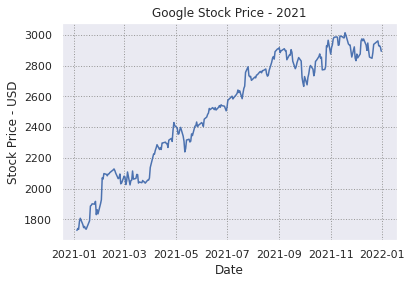

In [ ]:
# plotting our dataset
_ = plt.plot(df_idx)
_ = plt.title('Google Stock Price - 2021')
_ = plt.xlabel('Date')
_ = plt.ylabel('Stock Price - USD')
plt.show()

From the graph above we can see the clear trend of Google stock price to grow up since the beginning of the year. It is also the first reason that our data is most likely not stationary.

In [ ]:
# let's calculate moving averages by using rolling() function
df_idx['MA3'] = df_idx['Close'].rolling(window=3).mean()
df_idx['MA6'] = df_idx['Close'].rolling(window=6).mean()
df_idx['MA12'] = df_idx['Close'].rolling(window=12).mean()

df_idx.head()

,Close,MA3,MA6,MA12
Date,,,,
2021-01-04,1728.239990,NaN,NaN,NaN
2021-01-05,1740.920044,NaN,NaN,NaN
2021-01-06,1735.290039,1734.816691,NaN,NaN
2021-01-07,1787.250000,1754.486694,NaN,NaN
2021-01-08,1807.209961,1776.583333,NaN,NaN


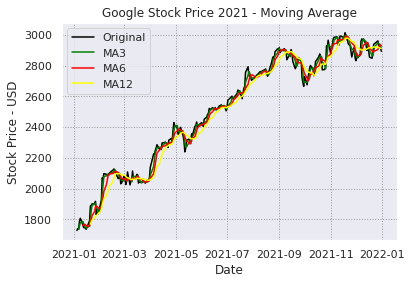

In [ ]:
# plotting the results
_ = plt.plot(df_idx['Close'], label='Original', color='black')
_ = plt.plot(df_idx['MA3'], label='MA3', color='green')
_ = plt.plot(df_idx['MA6'], label='MA6', color='red')
_ = plt.plot(df_idx['MA12'], label='MA12', color='yellow')
_ = plt.title('Google Stock Price 2021 - Moving Average')
_ = plt.xlabel('Date')
_ = plt.ylabel('Stock Price - USD')
_ = plt.legend(loc='best')
plt.show()

Looking at this graph we can ma a few points: moving average time series simply always lag from the original one; picking to small window sliding size will capture irrelevant noise where too big one will skip important moments; also mentioning by averaging we are losing the option to capture information of our picks/downs from original data; the final point is similar weights are assigned to all data points that will cause the confusion of important data for the future prediction.

In [ ]:
# so, it's time to build our MA model by using ARMA that is build from two
# like AR (autoregression model) and MA (moving average model). But, here
# we will ignore AR on focus on MA only.
# We start with splitting our data into training and testing parts
df_idx = df_idx['Close']
df_train = df_idx.iloc[ : len(df_idx) - 14]
df_test = df_idx.iloc[-14 : ]

df_train.shape, df_test.shape

((238,), (14,))

In [ ]:
# training the model
model_1 = ARMA(df_train, order=(0,1))
model_1_results = model_1.fit()
model_1_results

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# forecasting for the last two weeks of 2021
model_1_pred = model_1_results.forecast(steps=14)
model_1_pred[0]

array([2689.29310136, 2486.09645168, 2486.09645168, 2486.09645168,
       2486.09645168, 2486.09645168, 2486.09645168, 2486.09645168,
       2486.09645168, 2486.09645168, 2486.09645168, 2486.09645168,
       2486.09645168, 2486.09645168])

In [ ]:
# converting into DF for simplicity and plotting to see the results
df_pred_1 = pd.DataFrame({
    'Date' : df_test.index,
    'Prediction': model_1_pred[0]
})

df_pred_1.head(2)

,Date,Prediction
0,2021-12-13,2689.293101
1,2021-12-14,2486.096452


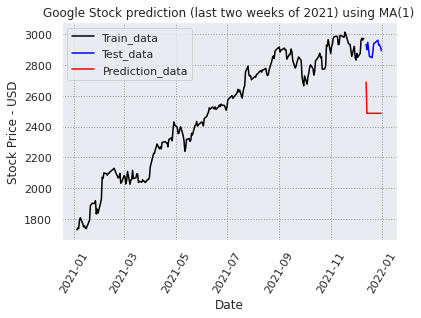

In [ ]:
_ = plt.plot(df_train, color='black', label='Train_data')
_ = plt.plot(df_test, color='blue', label='Test_data')
_ = plt.plot(df_pred_1.set_index('Date'), color='red',
             label='Prediction_data')
_ = plt.title('Google Stock prediction (last two weeks of 2021) using MA(1)')
_ = plt.legend(loc='best')
_ = plt.xlabel('Date')
_ = plt.ylabel('Stock Price - USD')
_ = plt.xticks(rotation=60)
plt.show()

From the graphs above we can see that our prediction is not great by using MA(1) on not probably stationary dataset. So, standing alone MA(1) is probably not a good choice for this kind of job.

In [ ]:
# let's see metrics
def get_metrics(df_test, df_pred_1):
  mse_result = mean_squared_error(df_test, df_pred_1.set_index('Date'))
  print(f"MSE: {mse_result}")
  mae = mean_absolute_error(df_test, df_pred_1.set_index('Date'))
  print(f"MAE: {mae}")
  rmse = np.sqrt(mean_squared_error(df_test, df_pred_1.set_index('Date')))
  print(f"RMSE: {mae}")

  return None

In [ ]:
get_metrics(df_test, df_pred_1)

MSE: 173275.31386259428
MAE: 412.38524691725223
RMSE: 412.38524691725223


Probably, we are getting this bad results because our data is not stationary. Let's confirm that our data is not stationary and if so, we will try to make it (by differencing: removing trend) as is supposed to be in the first place  (stationary).

In [ ]:
# to check if our data is stationary we will be using Augmented Dickey-Fuller
# unit root test, where the null hypothesis says that our data is not 
# stationary
adfuller_results = adfuller(df_train)

print(f"The test statistic: {adfuller_results[0]}")
print(f"P-value: {adfuller_results[1]}")
if adfuller_results[1] > 0.05:
  print("We FAIL to reject the null hypothesis that our data is not\
   stationary.")
else:
  print("We REJECT the null hypothesis that our data is not stationary.")

The test statistic: -1.7827591381606938
P-value: 0.3890542708191263
We FAIL to reject the null hypothesis that our data is not   stationary.


So, the Augmented Dickey-Fuller test confirms that our data is not stationary. Let's try to remove trend (by applying differencing method) to make our data stationary.

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html
df_idx_diff = df_idx.diff(periods=1)
df_idx_diff

Date
2021-01-04          NaN
2021-01-05    12.680054
2021-01-06    -5.630005
2021-01-07    51.959961
2021-01-08    19.959961
                ...    
2021-12-27    18.429931
2021-12-28   -32.320068
2021-12-29     1.130127
2021-12-30   -10.040039
2021-12-31   -26.459961
Name: Close, Length: 252, dtype: float64

In [ ]:
# dropping NaNs
df_idx_diff = df_idx_diff.dropna()
df_idx_diff.isnull().sum()

0

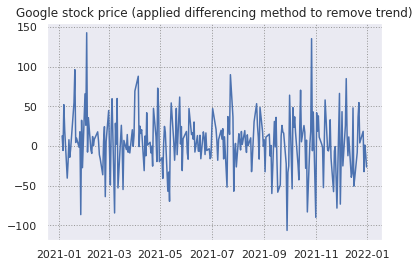

In [ ]:
# graphing results
_ = plt.plot(df_idx_diff)
_ = plt.title("Google stock price (applied differencing method to remove\
 trend)")
plt.show()

In [ ]:
# checking for stationarity
adfuller_results = adfuller(df_idx_diff)

print(f"The test statistic: {adfuller_results[0]}")
print(f"P-value: {adfuller_results[1]}")
if adfuller_results[1] > 0.05:
  print("We FAIL to reject the null hypothesis that our data is not\
   stationary.")
else:
  print("We REJECT the null hypothesis that our data is not stationary.")

The test statistic: -9.063684518319148
P-value: 4.49195194915277e-15
We REJECT the null hypothesis that our data is not stationary.


From the test above we can see that removing trend from our dataset we are making our data stationary. Not, let's try applying MA(1) on stationary data.

In [ ]:
# splitting our data into training testing parts
df_train = df_idx_diff.iloc[ : len(df_idx) - 14]
df_test = df_idx_diff.iloc[-14 : ]

df_train.shape, df_test.shape

((238,), (14,))

In [ ]:
# training the model
model_2 = ARMA(df_train, order=(0,1))
model_2_results = model_2.fit()
model_2_results

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
# forecasting for the last two weeks of 2021
model_2_pred = model_2_results.forecast(steps=14)
model_2_pred[0]

array([6.43337921, 5.07149265, 5.07149265, 5.07149265, 5.07149265,
       5.07149265, 5.07149265, 5.07149265, 5.07149265, 5.07149265,
       5.07149265, 5.07149265, 5.07149265, 5.07149265])

In [ ]:
# converting into DF for simplicity and plotting to see the results
df_pred_2 = pd.DataFrame({
    'Date' : df_test.index,
    'Prediction': model_2_pred[0]
})

df_pred_2.head(2)

,Date,Prediction
0,2021-12-13,6.433379
1,2021-12-14,5.071493


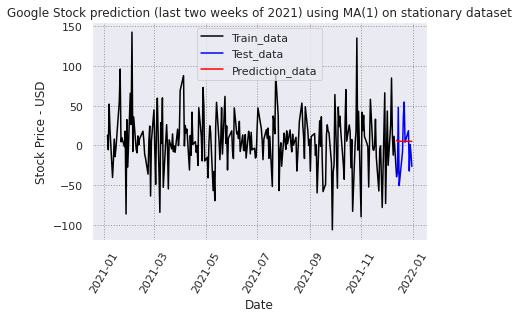

In [ ]:
_ = plt.plot(df_train, color='black', label='Train_data')
_ = plt.plot(df_test, color='blue', label='Test_data')
_ = plt.plot(df_pred_2.set_index('Date'), color='red',
             label='Prediction_data')
_ = plt.title('Google Stock prediction (last two weeks of 2021) using MA(1)\
 on stationary dataset')
_ = plt.legend(loc='best')
_ = plt.xlabel('Date')
_ = plt.ylabel('Stock Price - USD')
_ = plt.xticks(rotation=60)
plt.show()

In [ ]:
# let see metrics for stationary dataset
get_metrics(df_test, df_pred_2)

MSE: 1223.9022155488917
MAE: 30.45578060397667
RMSE: 30.45578060397667


From the graphs above and metrics test, we could say that results are still not promising, but at least we could say they are more relevant to actual data. But still, using MA(1) on its own (even with a stationary dataset) will not give you something incredible, but only the idea that some models are more useful than others for specific tasks (like stock prediction).